In [1]:
import scanpy as sc
import anndata
import os
import fnmatch
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import scrublet as scr
import importlib
import sys
from harmony import harmonize
import seaborn as sns
from matplotlib import rcParams
import math
from scipy import stats
import seaborn as sns
import scipy as sp
import h5py
import warnings
import random
import math
import scvelo as scv
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#Setting Scanpy figure parameters 
sc.settings.set_figure_params(dpi = 500, color_map = 'RdPu', dpi_save = 500)

In [4]:
adata = sc.read_h5ad("./adata_Final_for_Reinfection_publication.h5ad")
adata

AnnData object with n_obs × n_vars = 88360 × 25901
    obs: 'sample', 'DGE_name', 'monkey', 'array number', 'Sample Name', 'Sample type', 'Time point of sampling', 'Infusion before 2nd Mtb infection anti CD4 or IgG', 'Naïve or Primary Infection or Reinfection at sample time', 'Group', 'Group_Detailed', 'Drug Treatment', 'CFU Total ', 'Type of Mtb strain ', 'n_genes', 'n_counts', 'percent_mito', 'percent_ribo', 'percent_hbb', 'predicted_doublets', 'color', 'SubclusteringGroup', 'Subclustering', 'Doublet', 'leiden', 'leiden_lab_orig', 'Doublet_labels', 'Doublet_colors', 'Doublet_str', 'Doublet_int', 'CoarseClustering', 'SubclusteringV2'
    var: 'n_cells', 'Blacklist_Genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CoarseClustering_colors', 'Doublet_colors_colors', 'Doublet_str_colors', 'Group_colors', 'SubclusteringV2_colors', 'Subclustering_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_lab_orig_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups

In [5]:
sample_counts = adata.obs['sample'].value_counts()
group_counts = adata.obs['Group'].value_counts()

print("Sample Counts:")
print(sample_counts)

print("\nGroup Counts:")
print(group_counts)


Sample Counts:
13918_Array10Granul    5165
12818_Array6Granulo    4760
12818_Array5Granulo    4688
13918_Array9Granulo    4596
13518_Array4Granulo    4415
13818_Array8Granulo    4267
12518_Array3Granulo    4235
13518_Array2Granulo    4003
13918_Array8Granulo    3985
14218_Array11Granul    3959
13818_Array10Granul    3935
14218_Array12Granul    3826
13918_Array12Granul    3709
14018_Array3Granulo    3576
13518_Array6Granulo    3574
13918_Array11Granul    3562
12818_Array4Granulo    3062
13818_Array9Granulo    2627
14218_Array10Granul    2540
13518_Array5Granulo    1980
13818_Array12Granul    1656
13518_Array3Granulo    1619
13818_Array11Granul    1434
12518_Array2Granulo    1215
12818_Array3Granulo    1031
12518_Array5Granulo     956
14018_Array4Granulo     956
14018_Array2Granulo     785
14018_Array5Granulo     769
12818_Array2Granulo     661
12518_Array4Granulo     420
14218_Array8Granulo     391
14218_Array9Granulo       3
Name: sample, dtype: int64

Group Counts:
antiCD4    40512
Na

In [6]:
unique_samples_per_group = adata.obs.groupby('Group')['sample'].nunique()
print(unique_samples_per_group)

Group
IgG         8
Naïve      10
antiCD4    15
Name: sample, dtype: int64


# Plot cluster defining genes

In [7]:
adata_NEW_2 = sc.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, uns=adata.uns)
sc.pp.normalize_per_cell(adata_NEW_2, counts_per_cell_after=1e4)
sc.pp.log1p(adata_NEW_2)
sc.pp.highly_variable_genes(adata_NEW_2, n_top_genes=2000)
print(adata_NEW_2.var['highly_variable'].value_counts())  
adata_scaled = sc.pp.scale(adata_NEW_2, copy=True)  
adata_NEW_2.layers['scaled'] = adata_scaled.X  

False    24030
True      2000
Name: highly_variable, dtype: int64


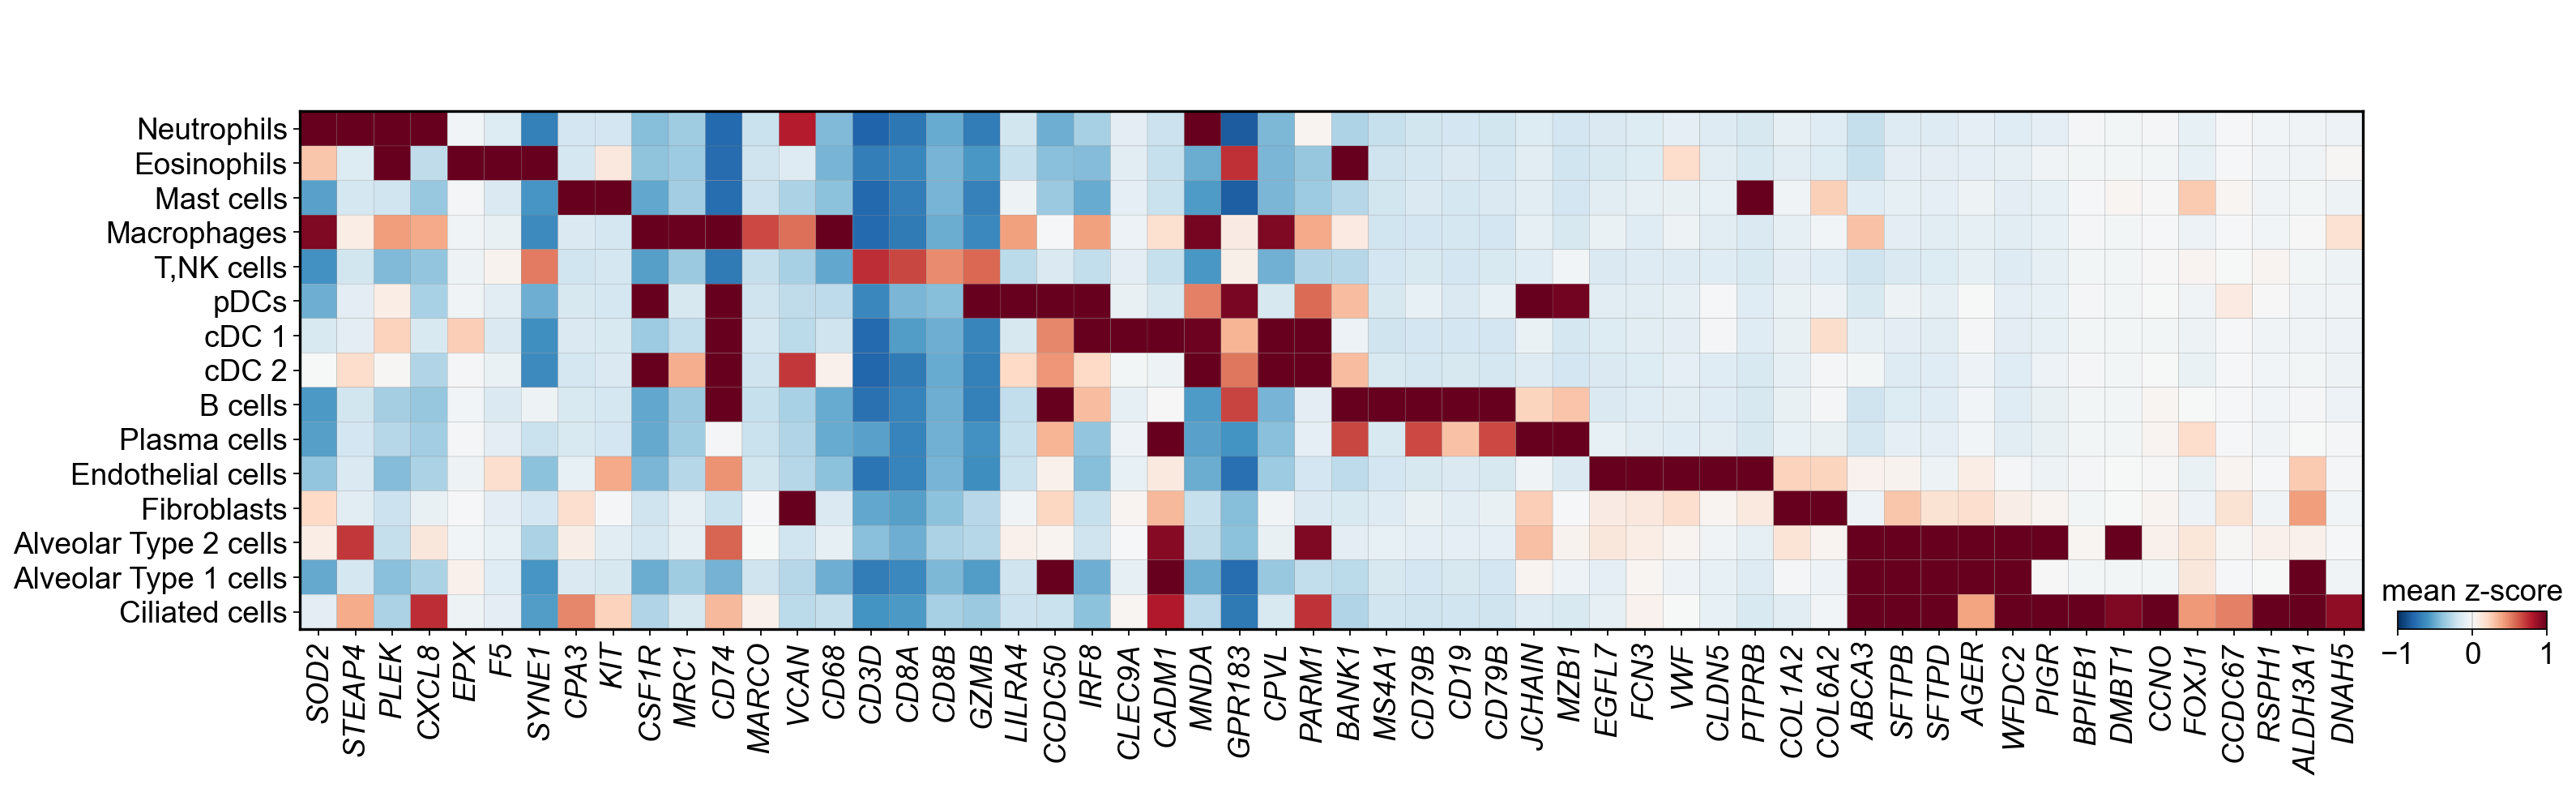

In [11]:
sc.set_figure_params(scanpy=True, fontsize=20)
Marker_Genes=["SOD2","STEAP4","PLEK","CXCL8","EPX","F5","SYNE1","CPA3","KIT","CSF1R","MRC1","CD74","MARCO","VCAN",'CD68',"CD3D","CD8A","CD8B","GZMB","LILRA4","CCDC50","IRF8",'CLEC9A',"CADM1","MNDA", "GPR183", "CPVL", "PARM1","BANK1","MS4A1","CD79B","CD19","CD79B","JCHAIN","MZB1","EGFL7","FCN3","VWF","CLDN5","PTPRB","COL1A2","COL6A2","ABCA3","SFTPB","SFTPD","AGER","WFDC2","PIGR","BPIFB1","DMBT1","CCNO","FOXJ1",'CCDC67',"RSPH1","ALDH3A1","DNAH5"]
mp=sc.pl.matrixplot(adata_NEW_2, var_names=Marker_Genes,groupby= 'CoarseClustering',
                    categories_order=[                                         
'Neutrophils',
'Eosinophils',
'Mast cells',
'Macrophages',
'T,NK cells',
'pDCs',
'cDC 1',
"cDC 2",                  
'B cells',                 
'Plasma cells',
'Endothelial cells',
'Fibroblasts',
'Alveolar Type 2 cells',
'Alveolar Type 1 cells',
'Ciliated cells'], dendrogram=False,
colorbar_title='mean z-score', layer='scaled', vmin=-1, vmax=1, cmap="RdBu_r",use_raw=True,swap_axes=False,return_fig=True)
main_ax = mp.get_axes()['mainplot_ax']
for text_obj in main_ax.get_xticklabels():
    text_obj.set_fontstyle('italic')
fig = main_ax.get_figure()
output_file_path = "/Users/joshuadavidbromley/Desktop/Reinfection_Figures_For_Publication/Figure3/Associated_Supplemental/Supplemental_Figure3_coarse_cell_type_gene_markers_heatmap.png"
fig.savefig(output_file_path, dpi=1000, transparent=True, bbox_inches='tight')
plt.show()


# Plot stacked bar plots for each granuloma 

In [16]:
def normalized_stacked_bar_plot(adata_gran_annot, x_value, color_value, palette=None, legend=True, ax=None, x_order=None):
    if color_value+"_colors" in adata_gran_annot.uns:
        palette = colors.ListedColormap(adata_gran_annot.uns[color_value+"_colors"])
    if x_value == "Group":
        df = order_labels(adata_gran_annot.obs, x_value, ["Naïve", "IgG", "antiCD4"])
    else:
        df = adata_gran_annot.obs
    tmp = df.groupby([x_value, color_value])[color_value].count().unstack(color_value).fillna(0)
    if x_order is not None:
        tmp = tmp.reindex(x_order)
    if ax is not None:
        tmp.divide(tmp.sum(axis=1), axis=0).plot(kind='bar', stacked=True, colormap=palette, ax=ax)
    else:
        ax = tmp.divide(tmp.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(24, 8), colormap=palette)
    ax.grid(False)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    plt.ylabel("proportion of cells")
    if legend:
        plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))
    else:
        ax.legend().set_visible(False)
    ax.set_ylim(0, 1.1)


In [17]:
def stacked_bar_plot(adata,x_value,color_value, palette=None, legend=True, ax=None):
    if color_value+"_colors" in adata.uns:
        palette = colors.ListedColormap(adata.uns[color_value+"_colors"])
   
    df = adata.obs
    if ax is not None:

        df.groupby([x_value,color_value])[color_value].count().unstack(color_value).fillna(0).plot(kind='bar',stacked=True,colormap=palette, ax=ax)
    else:
        ax=df.groupby([x_value,color_value])[color_value].count().unstack(color_value).fillna(0).plot(kind='bar',stacked=True,colormap=palette)
        ax.grid(False)
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
    plt.ylabel("n_cells")
    if legend:
        plt.legend(loc='upper center', bbox_to_anchor=(1.60, 1))
    else:
        ax.legend().set_visible(False)
        ax.grid(False)

In [18]:
def stacked_bar_plot(adata, x_value, color_value, palette=None, legend=True, ax=None, x_order=None):
    if color_value+"_colors" in adata.uns:
        palette = colors.ListedColormap(adata.uns[color_value+"_colors"])
  
    df = adata.obs
    grouped_data = df.groupby([x_value, color_value])[color_value].count().unstack(color_value).fillna(0)
    
    if x_order:
        grouped_data = grouped_data.reindex(x_order)
    
    if ax is not None:
        grouped_data.plot(kind='bar', stacked=True, colormap=palette, ax=ax)
    else:
        ax = grouped_data.plot(kind='bar', stacked=True, colormap=palette)
        ax.grid(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)
        ax.yaxis.tick_right()
        
    plt.xticks(fontsize=18)
    plt.yticks(rotation=0)
    plt.ylabel("Fraction of T,NK subset", size=18)
    
    if legend:
        plt.legend(loc='upper center', bbox_to_anchor=(1.90, 1))
    else:
        ax.legend().set_visible(False)
        ax.grid(False)


In [19]:
import matplotlib.colors as colors
def grouped_stacked_bars(adata, plot_sep, x_value, color_value, normalized=True, 
                         figwidth_mult=8, figheight=7, plot_order=None):
    if plot_order:
        adata.obs[plot_sep] = adata.obs[plot_sep].astype("category")
        adata.obs[plot_sep].cat.reorder_categories(plot_order, inplace=True)
    
    nplots = len(adata.obs[plot_sep].unique())
    plot_no = 0
    fig, ax = plt.subplots(1, nplots, sharey='all', figsize=(figwidth_mult*nplots, figheight), 
                           gridspec_kw={'width_ratios': [len(set(adata.obs.loc[adata.obs[plot_sep] == p, x_value])) 
                                                         for p in adata.obs[plot_sep].cat.categories]})
    
    for p in adata.obs[plot_sep].cat.categories:
        a = adata[adata.obs[plot_sep]==p]
        if normalized:
            normalized_stacked_bar_plot(a, x_value, color_value, legend=False, ax=ax[plot_no])
        else:
            stacked_bar_plot(a, x_value, color_value, legend=False, ax=ax[plot_no])
        ax[plot_no].set_title(p)
        plot_no += 1
    
    name_to_color = {}
    for a in ax:
        handles, labels = a.get_legend_handles_labels()
        for i, h in enumerate(labels):
            name_to_color[h] = handles[i]
        a.tick_params(left=False)
        a.grid(False)
        a.set_xlabel('')
        a.set_ylabel('Fraction of T,NK subset')
        for _, spine in a.spines.items():
            spine.set_visible(True)
    
    fig.legend(name_to_color.values(), name_to_color.keys(), loc='lower center', ncol=8, bbox_to_anchor=(.55, 1))


In [22]:
def grouped_stacked_bars(adata, plot_sep, x_value, color_value, normalized=True, 
                         figwidth_mult=8, figheight=7, plot_order=None, palette=None, legend=True):
    
    def stacked_bar_plot(df, x_value, color_value, palette=None, legend=True, ax=None):
        if color_value+"_colors" in adata.uns:
            palette = colors.ListedColormap(adata.uns[color_value+"_colors"])
        if normalized:
            grouped_data = df.groupby(x_value)[color_value].value_counts(normalize=True).unstack().fillna(0)
        else:
            grouped_data = df.groupby(x_value)[color_value].value_counts(normalize=False).unstack().fillna(0)

        if not ax:
            ax = plt.gca()

        grouped_data.plot(kind='bar', stacked=True, colormap=palette, ax=ax)
        ax.grid(False)
        ax.set_ylabel('Number of T,NK subset' if not normalized else 'Fraction of T,NK subset')
        #ax.yaxis.tick_right()
        #ax.yaxis.set_label_position("right")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontstyle='italic')

        if not legend:
            ax.get_legend().remove()

    if plot_order:
        adata.obs[plot_sep] = adata.obs[plot_sep].astype("category")
        adata.obs[plot_sep].cat.reorder_categories(plot_order, inplace=True)
    
    nplots = len(adata.obs[plot_sep].unique())
    fig, ax = plt.subplots(1, nplots, sharey='all', figsize=(figwidth_mult*nplots, figheight), 
                           gridspec_kw={'width_ratios': [len(set(adata.obs.loc[adata.obs[plot_sep] == p, x_value])) 
                                                         for p in adata.obs[plot_sep].cat.categories]})
    
    for plot_no, p in enumerate(adata.obs[plot_sep].cat.categories):
        a = adata[adata.obs[plot_sep] == p]
        stacked_bar_plot(a.obs, x_value, color_value, palette=palette, legend=False, ax=ax[plot_no])
        ax[plot_no].set_title(p)

    name_to_color = {}
    for a in ax:
        handles, labels = a.get_legend_handles_labels()
        for i, h in enumerate(labels):
            name_to_color[h] = handles[i]
        a.tick_params(left=False)
        a.grid(False)
        a.set_xlabel('')
        a.set_ylabel('Fraction of Cell Type')
        for _, spine in a.spines.items():
            spine.set_visible(True)
            spine.set_linewidth(2) 
    
    fig.legend(name_to_color.values(), name_to_color.keys(), loc='lower center', ncol=8, bbox_to_anchor=(.55, 1))
    return fig
    #plt.show()


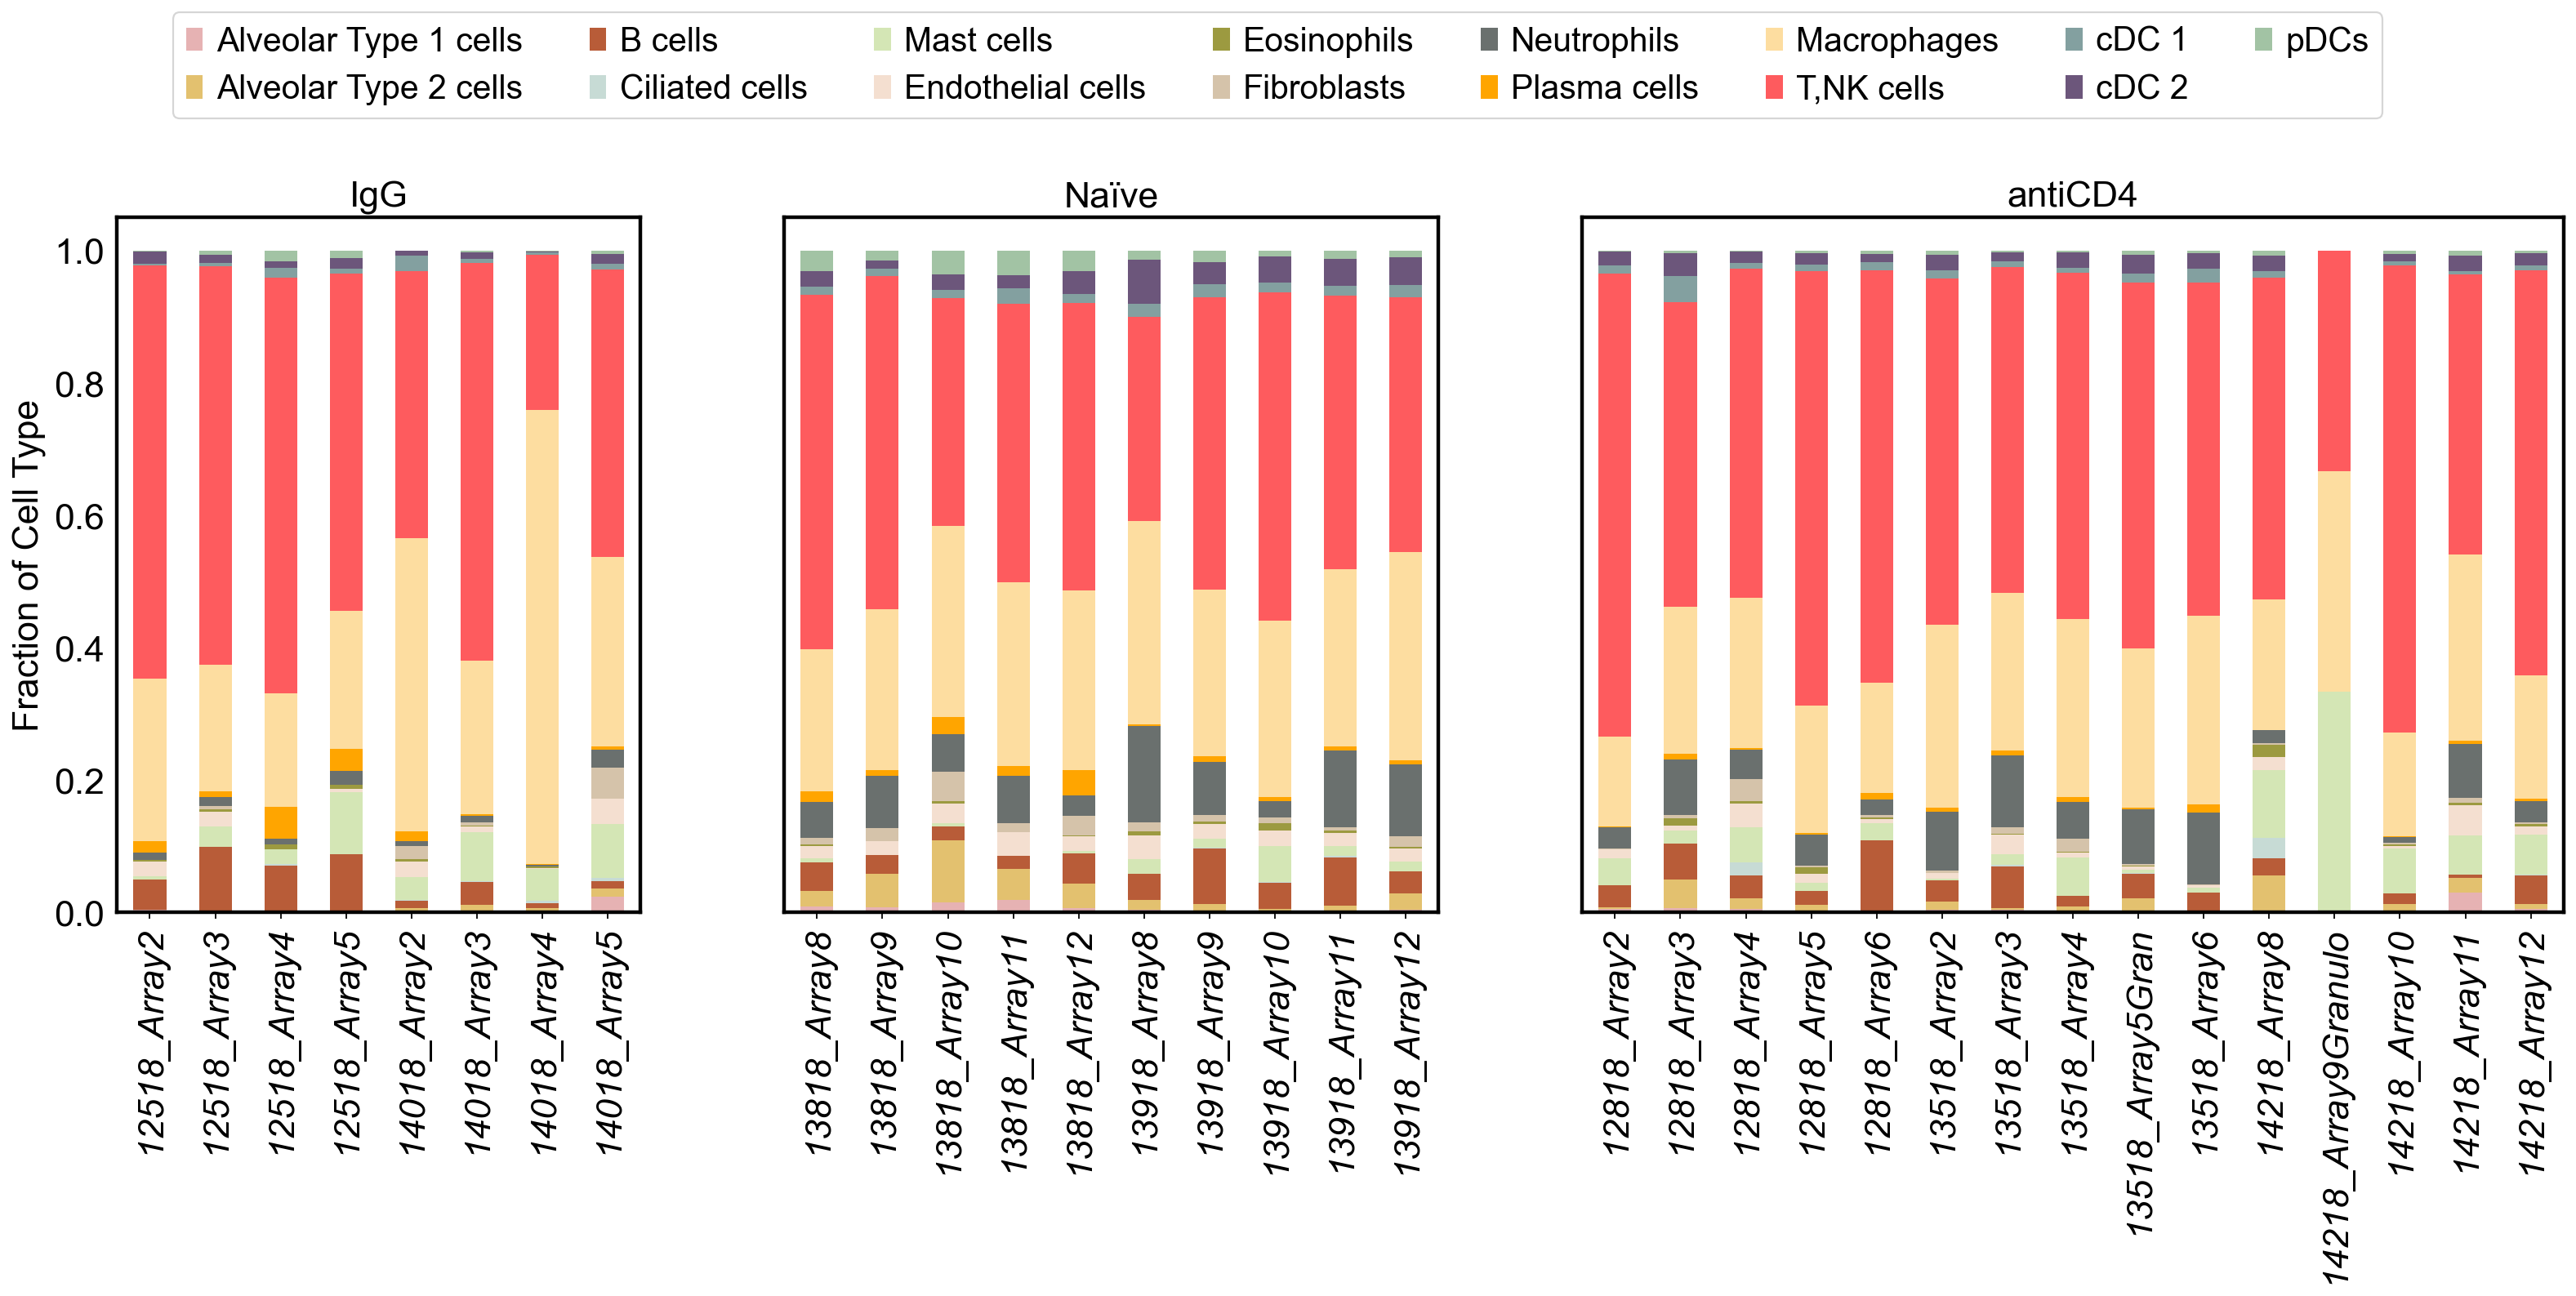

In [23]:
plt.rcParams['axes.linewidth'] = 2
grouped_stacked_bars(adata,plot_sep='Group',x_value='array number',color_value='CoarseClustering')
plt.savefig("./Reinfection_Figures_For_Publication/Figure3/Associated_Supplemental/Figure3_StackedBarPlot_Granuloma_Group.png",bbox_inches="tight",dpi=1000)


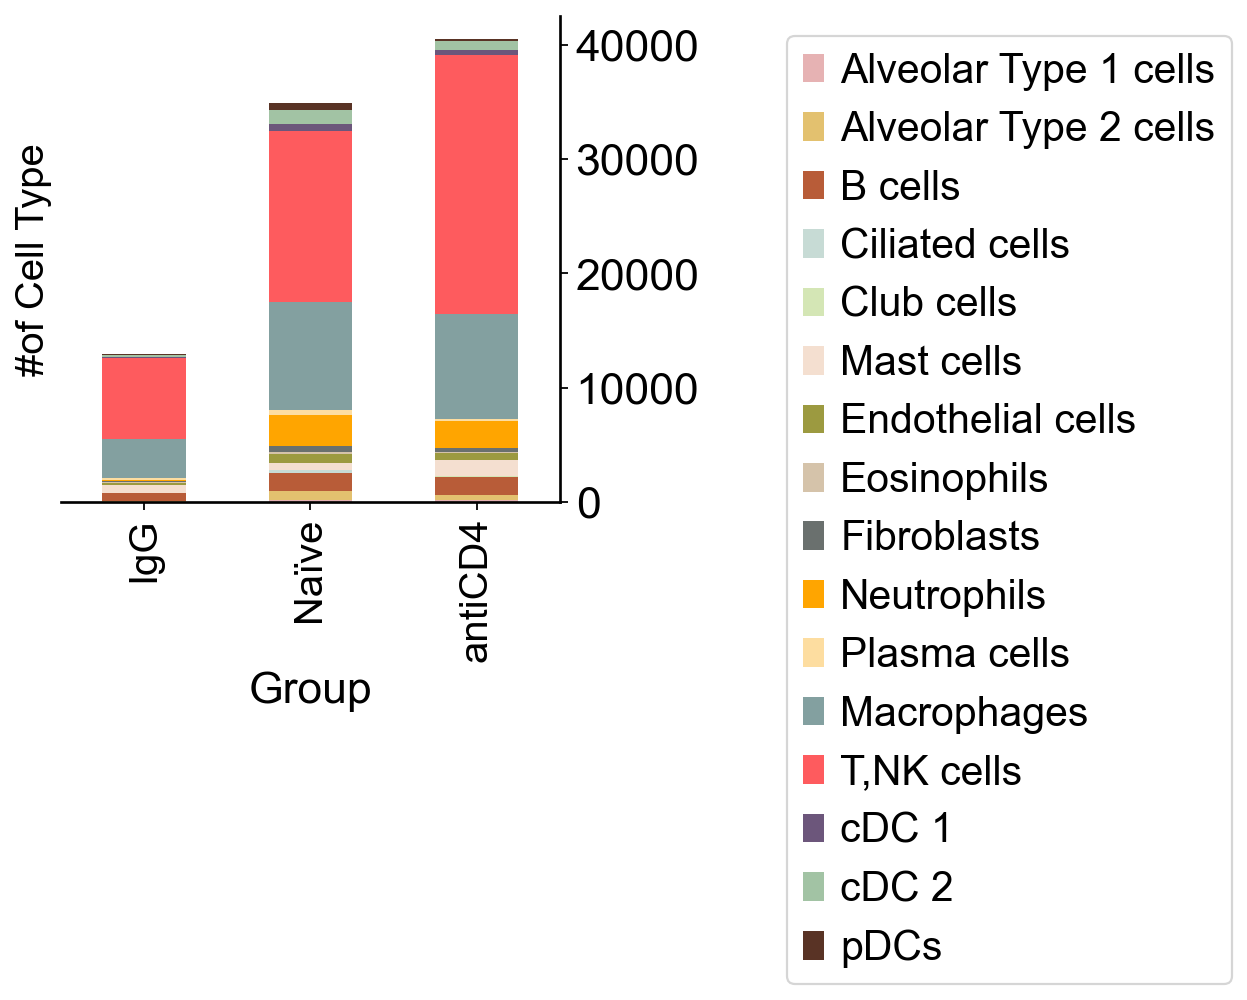

In [13]:
#not included in publication
plt.rcParams['axes.linewidth'] = 1.2
stacked_bar_plot(adata,x_value='Group',color_value='CoarseClustering', palette=None, legend=True, ax=None)
plt.savefig("./Reinfection_Figures_For_Publication/Figure3/Associated_Supplemental/Figure3_Supplemental_CellNumber_Stacked_Granuloma_Group.png",bbox_inches="tight",dpi=1000)
